Spatially resolved cell atlas of the mouse primary motor cortex by MERFISH

ShortName: zhang2021spatially

Steps of processing the data from raw to Anndata:

In [1]:
# 1, Download the raw data from https://doi.brainimagelibrary.org/doi/10.35077/g.21

In [ ]:
# note: this dataset is one of the first product of BICCN project

In [1]:
from soview import *
import shutil
import os
import gc
import pandas as pd

scanpy==1.8.2 anndata==0.8.0 umap==0.5.2 numpy==1.20.3 scipy==1.7.3 pandas==1.3.5 scikit-learn==1.0.2 statsmodels==0.13.1 python-igraph==0.9.8 pynndescent==0.5.5
squidpy==1.1.2


In [2]:
raw_path = '/aaa/jianhuayao/project2/zhiyuanyuan/PUBDT/st/merfish/mop/MERFISH_Nature_cortex/processed_data'
h5ad_path = '/aaa/jianhuayao/project2/zhiyuanyuan/PUBDT/st/merfish/mop/MERFISH_Nature_cortex/h5ad'

In [3]:
adata = sc.read_h5ad(f'{raw_path}/counts.h5ad')

In [4]:
segment_matrix_raw = pd.read_csv(f'{raw_path}/segmented_cells_mouse1sample1.csv',dtype='str',delimiter=',',skiprows=1,names=['cell_id','x','y','slide_id'],quotechar='\"')



In [5]:
cell_id_list = np.array(segment_matrix_raw['cell_id'])

In [6]:
x_list = []
y_list = []
for i in range((segment_matrix_raw.shape[0])):
    x_boundary = np.array(segment_matrix_raw['x'][i].split(', ')).astype('float')
    y_boundary = np.array(segment_matrix_raw['y'][i].split(', ')).astype('float')
    cur_x = np.mean(x_boundary)
    cur_y = np.mean(y_boundary)
    x_list.append(cur_x)
    y_list.append(cur_y)

# bulk run

In [9]:
sample_list = ['mouse1sample1','mouse1sample2','mouse1sample3','mouse1sample4','mouse1sample5','mouse1sample6',
              'mouse2sample1','mouse2sample2','mouse2sample3','mouse2sample4','mouse2sample5','mouse2sample6',


              ]
cell_id_list_all = []
x_list_all = []
y_list_all = []
slide_id_list_all = []
for sample in sample_list:
    segment_matrix_raw = pd.read_csv(f'{raw_path}/segmented_cells_{sample}.csv',dtype='str',delimiter=',',skiprows=1,names=['cell_id','x','y','slide_id'],quotechar='\"')
    cell_id_list = np.array(segment_matrix_raw['cell_id'])
    x_list = []
    y_list = []
    for i in range((segment_matrix_raw.shape[0])):
        x_boundary = np.array(segment_matrix_raw['x'][i].split(', ')).astype('float')
        y_boundary = np.array(segment_matrix_raw['y'][i].split(', ')).astype('float')
        cur_x = np.mean(x_boundary)
        cur_y = np.mean(y_boundary)
        x_list.append(cur_x)
        y_list.append(cur_y)
    slide_id_list = np.array(segment_matrix_raw['slide_id'])
    cell_id_list_all.extend(cell_id_list)
    x_list_all.extend(x_list)
    y_list_all.extend(y_list)
    slide_id_list_all.extend(slide_id_list)


    


In [10]:
adata.shape


(280327, 254)

In [13]:
len(cell_id_list_all)

401052

In [15]:
cell_id_list_filter = []
x_list_filter = []
y_list_filter = []
slide_id_list_filter = []
for i in range(len(cell_id_list_all)):
    if cell_id_list_all[i] in adata.obs_names:
        cell_id_list_filter.append(cell_id_list_all[i])
        x_list_filter.append(x_list_all[i])
        y_list_filter.append(y_list_all[i])
        slide_id_list_filter.append(slide_id_list_all[i])
        

In [17]:
adata_new = adata[cell_id_list_filter]

In [18]:
adata_new.obsm['spatial'] = np.vstack([x_list_filter,y_list_filter]).transpose()
adata_new.obs['slide_id'] = slide_id_list_filter

In [20]:
adata_new.write_h5ad(f'{h5ad_path}/all.h5ad')

In [30]:
adata_new = sc.read_h5ad(f'{h5ad_path}/all.h5ad')

In [32]:
for sample in np.unique(adata_new.obs['slide_id']):
    a_sample = adata_new[adata_new.obs['slide_id']==sample]
    # sc.pl.embedding(a_sample,basis='spatial',color='leiden')
    a_sample.write_h5ad(f'{h5ad_path}/{sample}.h5ad')

In [21]:
sc.pp.normalize_total(adata_new, inplace=True)
sc.pp.log1p(adata_new)

In [22]:
sc.pp.neighbors(adata_new)
sc.tl.leiden(adata_new)

         Falling back to preprocessing with `sc.pp.pca` and default params.


OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


In [23]:
sc.tl.umap(adata_new)

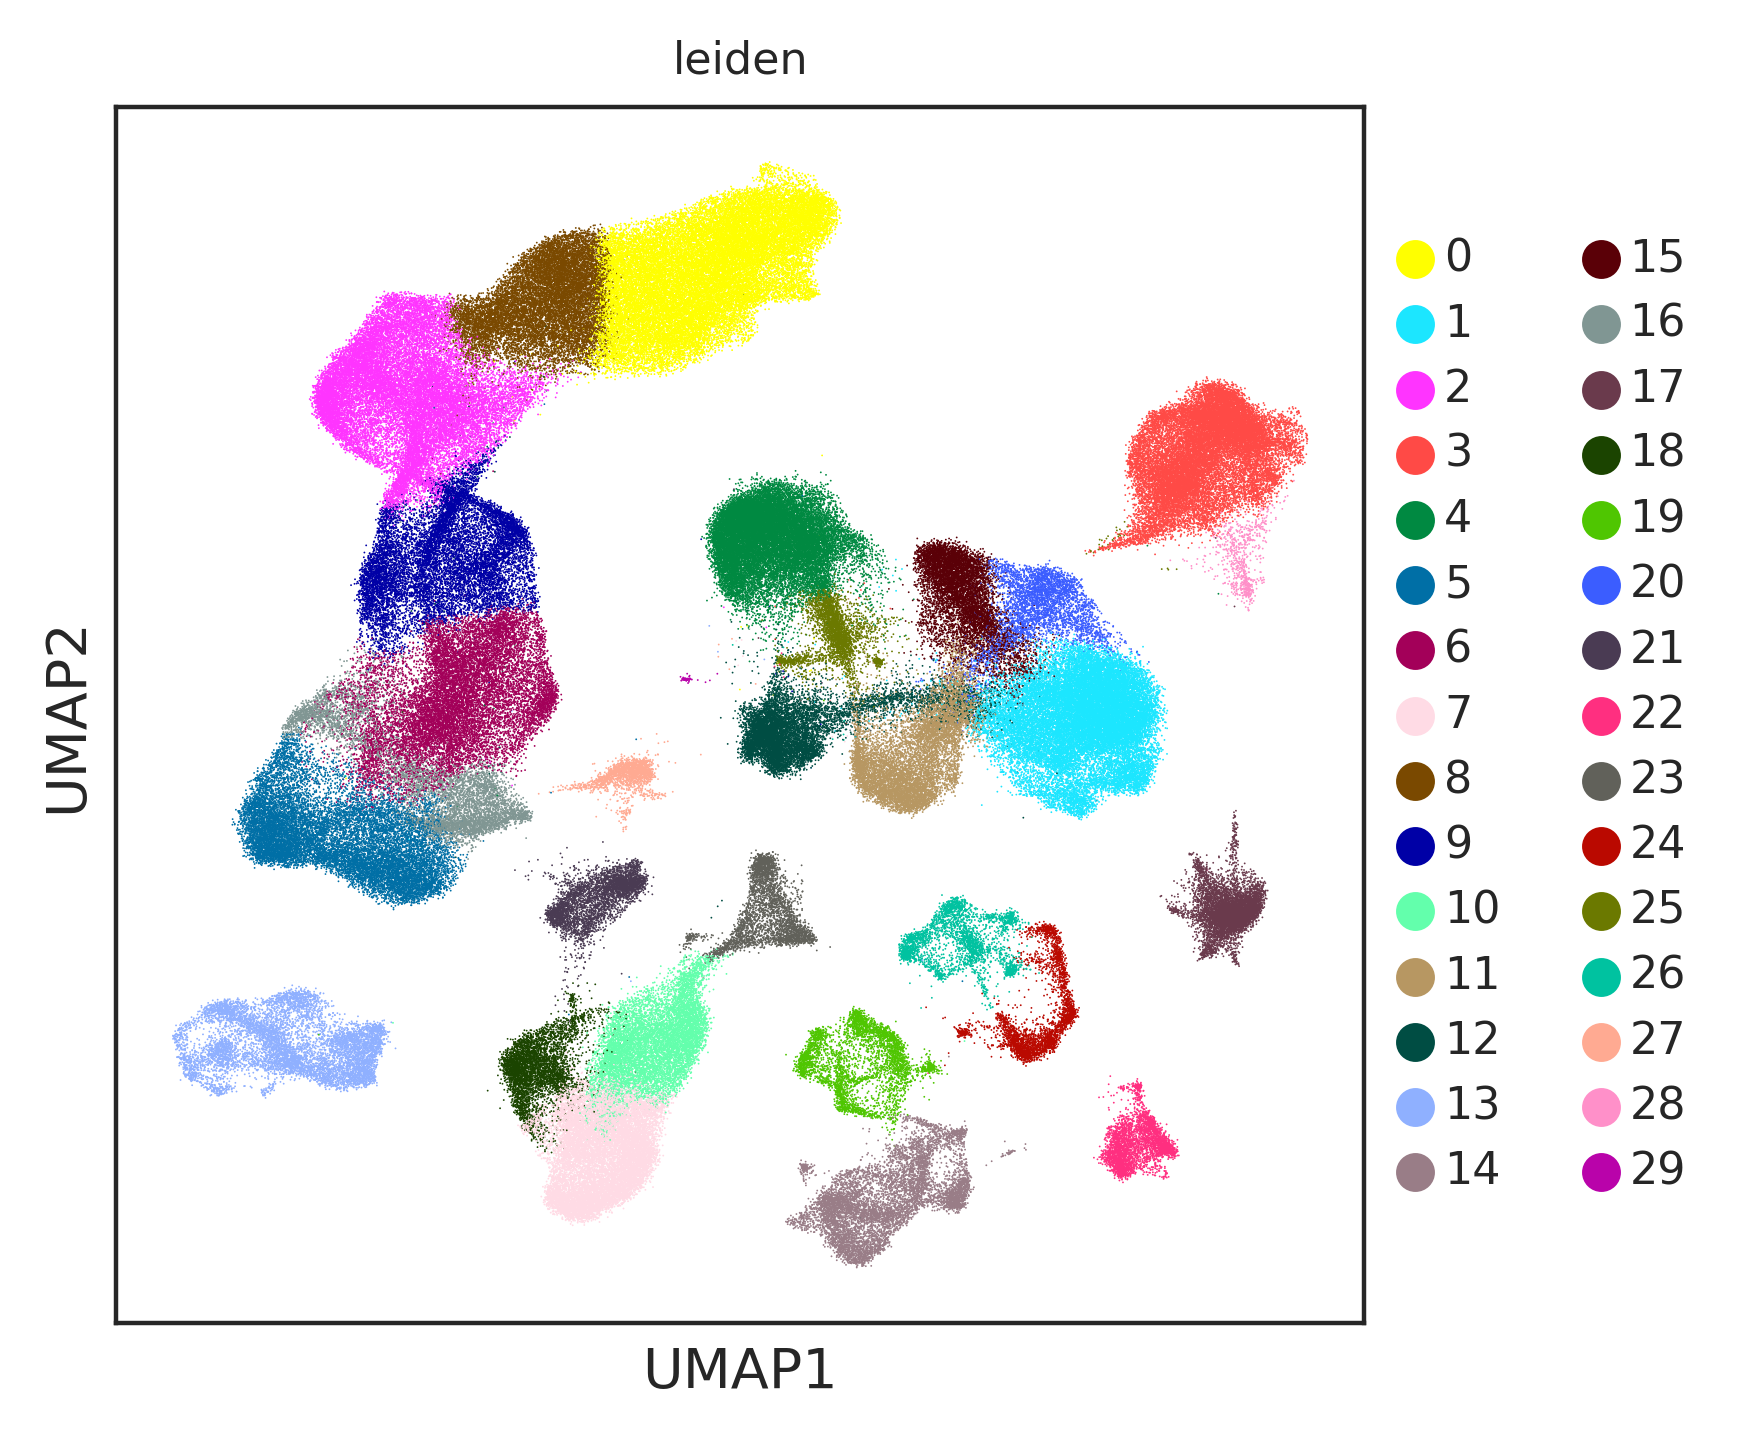

In [25]:
sc.pl.umap(adata_new,color='leiden')

In [28]:
np.unique(adata_new.obs['slide_id'])

array(['mouse1_slice1', 'mouse1_slice10', 'mouse1_slice102',
       'mouse1_slice112', 'mouse1_slice122', 'mouse1_slice131',
       'mouse1_slice153', 'mouse1_slice162', 'mouse1_slice170',
       'mouse1_slice180', 'mouse1_slice190', 'mouse1_slice200',
       'mouse1_slice201', 'mouse1_slice21', 'mouse1_slice212',
       'mouse1_slice221', 'mouse1_slice232', 'mouse1_slice241',
       'mouse1_slice251', 'mouse1_slice260', 'mouse1_slice271',
       'mouse1_slice283', 'mouse1_slice291', 'mouse1_slice301',
       'mouse1_slice31', 'mouse1_slice313', 'mouse1_slice326',
       'mouse1_slice40', 'mouse1_slice50', 'mouse1_slice62',
       'mouse1_slice71', 'mouse1_slice81', 'mouse1_slice91',
       'mouse2_slice1', 'mouse2_slice10', 'mouse2_slice109',
       'mouse2_slice119', 'mouse2_slice129', 'mouse2_slice139',
       'mouse2_slice151', 'mouse2_slice160', 'mouse2_slice169',
       'mouse2_slice189', 'mouse2_slice20', 'mouse2_slice201',
       'mouse2_slice209', 'mouse2_slice219', 'mouse2_sl

In [ ]:
for sample in np.unique(adata_new.obs['slide_id']):
    a_sample = adata_new[adata_new.obs['slide_id']==sample]
    sc.pl.embedding(a_sample,basis='spatial',color='leiden')